# Définition des descripteurs pour le mapping des paramètres de contrôle de l'instrument virtuel

**Fonctions utiles :**
```
from descripteurs import Classifier_son, Classifier_regimes, Classifier_justesse
```

### Liste des descripteurs : 

**Un son est produit**

Le descripteur est le moyennage des amplitudes sur la fin des oscillations (source : Missoum, Vergez & Doc, 2014) :

$$
\begin{equation}
D_{son} = \frac{1}{N_{2/3}} \sum_{N_{2/3}} p(t_i)
\end{equation}
\tag{1}
$$

Classification :
- D_{son} > $\epsilon_1$ : oscillations 
- D_{son} $\leq$ $\epsilon_1$ : régime statique

-> $\epsilon_1$ à déterminer

**Régime d'oscillation**

Distinction entre régime périodique et régime quasi-périodique. Pour cela on utilise la forme de l'enveloppe de puissance de la pression au niveau de l'embouchure. 

$$
\begin{equation}
D_{régime} = \frac{Var(power)}{<power>}
\end{equation}
\tag{2}
$$

Dans le cours de Christophe, $\epsilon_2 = 10^{-2}$

**Justesse de la note**

La justesse est évaluée en cents (réf : Missoum, Vergez & Doc, 2014). 
$$
\begin{equation}
D_{note} = 1200 \log_2\left( \frac{f_{act}}{f_{ref}} \right)
\tag{3}
\end{equation}
$$
Le seuil pour la classification $\epsilon_3$ est fixé à 5 cents d'écart entre la fréquence de référence et la fréquence produite calculée à partir de l'algorithme de Yin dans l'article. Ici, on remplace cet algorithme temporel par la méthode du produit spectral (fait l'hypothèse qu'il existe de l'énergie dans le spectre en $f_0$, plus robuste que la somme spectrale.)

**Longueur du transitoire d'attaque**

idées de ressource :
- thèse victor Salvador-castrillo (violon), 2024
- evangelista, acquilino, 2025
- Peeters et al., The Timbre Toolbox ..., 2010
- Rodet, Jaillet : Detection and modeling of fast attack transients

**Bifurcation directe ou indirecte à l'extinction et au seuil d'oscillation**

Taillard et Kergomard, 2013

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
from clarinette_classe import Clarinette_DelayLine

In [2]:
class LatinSquare : 

    def __init__(self, n_data, u, dims = 2):
        from scipy.stats import qmc
        self.n_data = n_data
        self.u = u
        self.dims = dims
        self.sampler = qmc.LatinHypercube(self.dims)

    def indices(self) : 
        """
        Renvoie une liste d'indices suivant une distribution en carré latin
        """
        return self.sampler.integers(self.u, n=self.n_data)

In [3]:
gamma = np.linspace(0,1,1000)
zeta = np.linspace(0,1,1000)

carre_latin = LatinSquare(n_data = 500, u = len(gamma) - 1)
indexes = carre_latin.indices()

c = 20.05*np.sqrt(273.15 + 20)
L = 0.66 
T = 2*L/c 
dur = 0.1
delta_t = T/128
clarinette = Clarinette_DelayLine()

## 1. Régime oscillant atteint

In [2]:
def descripteur_son(P) : 
    N = len(P)
    N_tiers = N % 3
    P_tiers = P[2*N_tiers:]
    return np.mean(P_tiers)

def classifieur_son(D_son, eps1) : 
    c = 0 # classe du son, 0 si régime statique ou 1 si régime oscillant
    if D_son > eps1 : 
        c = 1 
    return c

In [ ]:
D_son = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i, "/500")
    clarinette.params_controle_musicien(gamma[index[0]],zeta[index[1]])
    _, _, P, _, _ = clarinette.execution(dur, delta_t)
    D_son[i] = descripteur_son(P)

epoch : 0 /500
epoch : 1 /500
epoch : 2 /500
epoch : 3 /500
epoch : 4 /500
epoch : 5 /500
epoch : 6 /500
epoch : 7 /500
epoch : 8 /500
epoch : 9 /500
epoch : 10 /500
epoch : 11 /500
epoch : 12 /500
epoch : 13 /500
epoch : 14 /500
epoch : 15 /500
epoch : 16 /500
epoch : 17 /500
epoch : 18 /500
epoch : 19 /500
epoch : 20 /500
epoch : 21 /500
epoch : 22 /500
epoch : 23 /500
epoch : 24 /500
epoch : 25 /500
epoch : 26 /500
epoch : 27 /500
epoch : 28 /500
epoch : 29 /500
epoch : 30 /500
epoch : 31 /500
epoch : 32 /500
epoch : 33 /500
epoch : 34 /500
epoch : 35 /500
epoch : 36 /500
epoch : 37 /500
epoch : 38 /500
epoch : 39 /500
epoch : 40 /500
epoch : 41 /500
epoch : 42 /500
epoch : 43 /500
epoch : 44 /500
epoch : 45 /500
epoch : 46 /500
epoch : 47 /500
epoch : 48 /500
epoch : 49 /500
epoch : 50 /500
epoch : 51 /500
epoch : 52 /500
epoch : 53 /500
epoch : 54 /500
epoch : 55 /500
epoch : 56 /500
epoch : 57 /500
epoch : 58 /500
epoch : 59 /500
epoch : 60 /500
epoch : 61 /500
epoch : 62 /500
ep

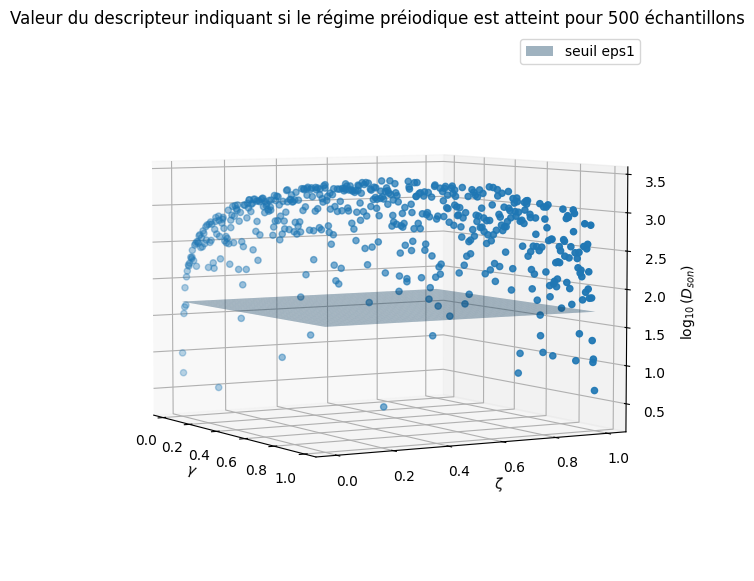

In [ ]:
eps1 = 50
axis = np.linspace(0,1,500)
yi, xi = np.meshgrid(axis,axis)
zi = np.full_like(xi, np.log10(eps1))

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,0]], np.log10(D_son))
ax.plot_surface(xi,yi,zi,alpha = 0.4, label = "seuil eps1")
ax.set_zlabel(r"$\log_{10}(D_{son})$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Valeur du descripteur indiquant si le régime préiodique est atteint pour 500 échantillons")
ax.legend()
ax.view_init(elev=5., azim=-30, roll=0)

Par lecture graphique, on obtient $\epsilon_1 \approx 50$ USI.

In [57]:
class Classifier_son:
    
    def __init__(self, eps1 = 50):
        self.eps1 = eps1
    
    def descripteur_son(self, P) :
        """
        Renvoie la valeur de la pression moyennée sur le dernier tiers des échantillons
        """ 
        N = len(P)
        N_tiers = N % 3
        P_tiers = P[2*N_tiers:]
        return np.mean(P_tiers)
    
    def classifieur_son(self, P) :
        """
        Renvoie 0 si les paramètres ne permettent pas de produire un son, 1 sinon.  
        """
        D_son = self.descripteur_son(P)
        c = 0
        if D_son > self.eps1 : 
            c = 1 
        return c

**Question : est-ce qu'on obtient le même $\epsilon_1$ pour le violon ? 

## 2. Régime d'oscillation

In [7]:
dur = 4
clarinette.params_controle_musicien(0.7,0.6)
_, _, P, _, _ = clarinette.execution(dur, delta_t)
fs = 1/delta_t

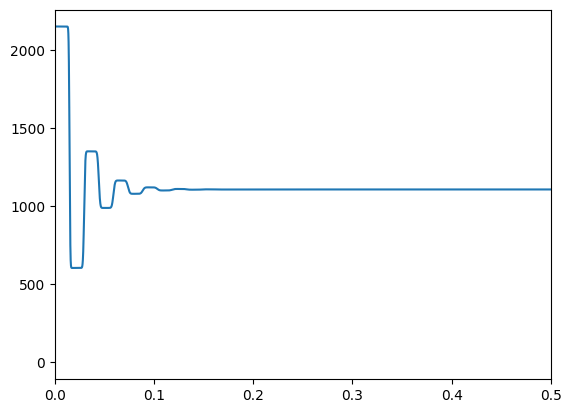

In [8]:
plt.plot(np.arange(len(P))*delta_t, P)
plt.xlim((0,0.5))
plt.show()

0.011997699737548828 0.08739256858825684 0.0460658073425293


Text(0, 0.5, 'pwr')

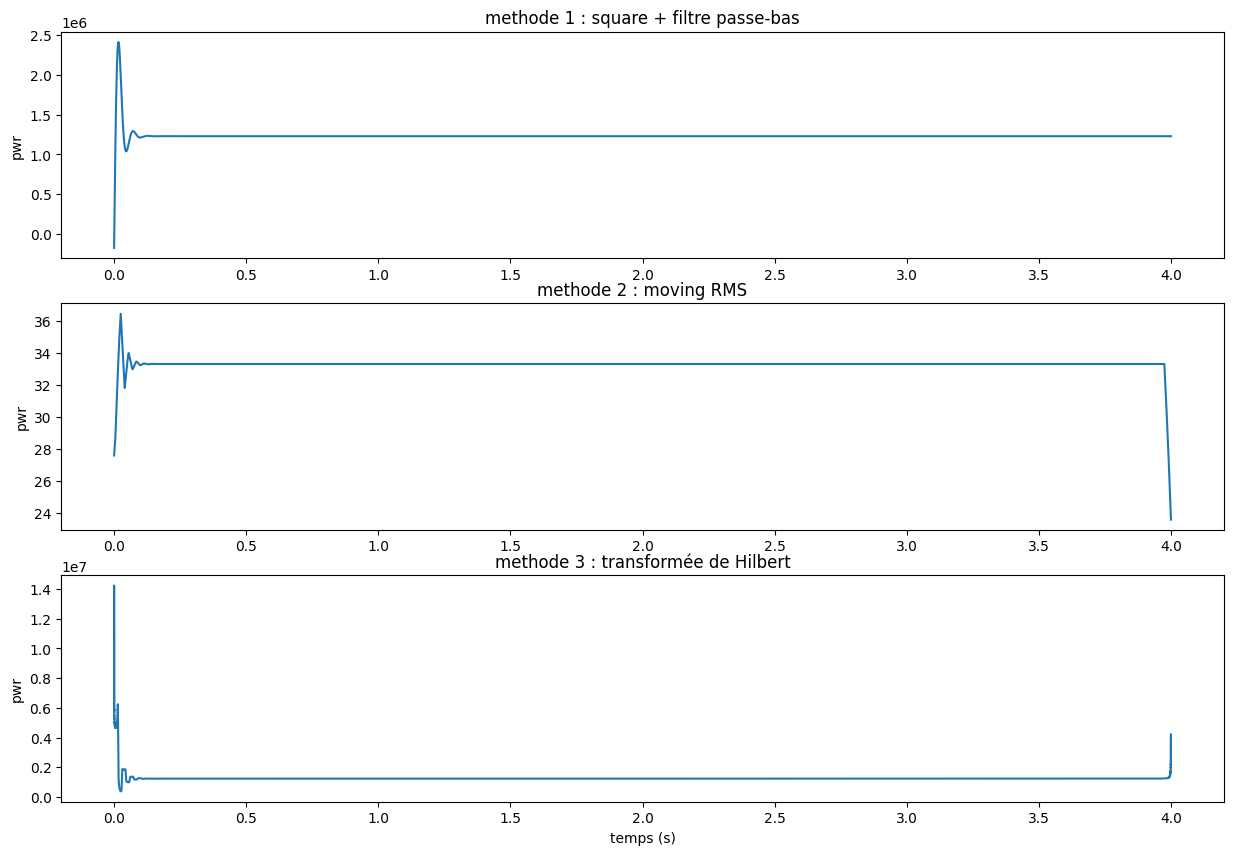

In [10]:
# Calcul de l'enveloppe de puissance
import time

# methode 1 : square + filtre passe-bas 
from scipy.signal import butter, filtfilt
start = time.time()
power = P**2
cutoff = 20  # enveloppe = ce qui varie lentement
b, a = butter(4, cutoff / (1 / (2*delta_t)), btype='low')
power_meth1 = filtfilt(b, a, power)
end = time.time()
temps1 = end - start

# methode 2 : moving RMS
window_ms = 50  # RMS window length
window_samples = int(fs * window_ms / 1000)
kernel = np.ones(window_samples) / window_samples
start = time.time()
power_meth2 = np.sqrt(np.convolve(P, kernel, mode='same'))
end = time.time()
temps2 = end - start

# methode 3 : transformée de Hilbert
from scipy.signal import hilbert
start = time.time()
analytic_signal = hilbert(P)
amplitude_envelope = np.abs(analytic_signal)
power_meth3 = amplitude_envelope**2
end = time.time()
temps3 = end - start

# plot
print(temps1, temps2, temps3)

plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(np.arange(len(power_meth1))*delta_t, power_meth1)
plt.title("methode 1 : square + filtre passe-bas")
plt.ylabel("pwr")
plt.subplot(312)
plt.plot(np.arange(len(power_meth2))*delta_t, power_meth2)
plt.title("methode 2 : moving RMS")
plt.ylabel("pwr")
plt.subplot(313)
plt.plot(np.arange(len(power_meth3))*delta_t, power_meth3)
plt.title("methode 3 : transformée de Hilbert")
plt.xlabel("temps (s)")
plt.ylabel("pwr")

In [7]:
from scipy.signal import butter, filtfilt

fs = 1/delta_t
cutoff = 20  # enveloppe = ce qui varie lentement
b, a = butter(4, cutoff / (fs / 2), btype='low')

def descripteur_regime(P, cutoff = 20, fs = 1/delta_t):
    power = P**2
    pwr = filtfilt(b, a, power)
    D_regime = np.var(pwr)/np.mean(pwr)
    return D_regime

# Détermination de $\epsilon_2$
dur = 0.5
D_regime = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/500")
    clarinette.params_controle_musicien(gamma[index[0]],zeta[index[1]])
    _, _, P, _, _ = clarinette.execution(dur, delta_t)
    D_regime[i] = descripteur_regime(P)

epoch : 1 /500
epoch : 2 /500
epoch : 3 /500
epoch : 4 /500
epoch : 5 /500
epoch : 6 /500
epoch : 7 /500
epoch : 8 /500
epoch : 9 /500
epoch : 10 /500
epoch : 11 /500
epoch : 12 /500
epoch : 13 /500
epoch : 14 /500
epoch : 15 /500
epoch : 16 /500
epoch : 17 /500
epoch : 18 /500
epoch : 19 /500
epoch : 20 /500
epoch : 21 /500
epoch : 22 /500
epoch : 23 /500
epoch : 24 /500
epoch : 25 /500
epoch : 26 /500
epoch : 27 /500
epoch : 28 /500
epoch : 29 /500
epoch : 30 /500
epoch : 31 /500
epoch : 32 /500
epoch : 33 /500
epoch : 34 /500
epoch : 35 /500
epoch : 36 /500
epoch : 37 /500
epoch : 38 /500
epoch : 39 /500
epoch : 40 /500
epoch : 41 /500
epoch : 42 /500
epoch : 43 /500
epoch : 44 /500
epoch : 45 /500
epoch : 46 /500
epoch : 47 /500
epoch : 48 /500
epoch : 49 /500
epoch : 50 /500
epoch : 51 /500
epoch : 52 /500
epoch : 53 /500
epoch : 54 /500
epoch : 55 /500
epoch : 56 /500
epoch : 57 /500
epoch : 58 /500
epoch : 59 /500
epoch : 60 /500
epoch : 61 /500
epoch : 62 /500
epoch : 63 /500
e

c:\Users\Lalie\Desktop\M2 2025-2026\PAM\codes\clarinette_classe.py:105: RuntimeWarning: invalid value encountered in scalar divide
  u = zeta * (1+p-gamma) * np.sqrt(np.abs(gamma-p)) * (gamma-p)/np.abs(gamma-p) # débit adimensionné


epoch : 458 /500
epoch : 459 /500
epoch : 460 /500
epoch : 461 /500
epoch : 462 /500
epoch : 463 /500
epoch : 464 /500
epoch : 465 /500
epoch : 466 /500
epoch : 467 /500
epoch : 468 /500
epoch : 469 /500
epoch : 470 /500
epoch : 471 /500
epoch : 472 /500
epoch : 473 /500
epoch : 474 /500
epoch : 475 /500
epoch : 476 /500
epoch : 477 /500
epoch : 478 /500
epoch : 479 /500
epoch : 480 /500
epoch : 481 /500
epoch : 482 /500
epoch : 483 /500
epoch : 484 /500
epoch : 485 /500
epoch : 486 /500
epoch : 487 /500
epoch : 488 /500
epoch : 489 /500
epoch : 490 /500
epoch : 491 /500
epoch : 492 /500
epoch : 493 /500
epoch : 494 /500
epoch : 495 /500
epoch : 496 /500
epoch : 497 /500
epoch : 498 /500
epoch : 499 /500
epoch : 500 /500


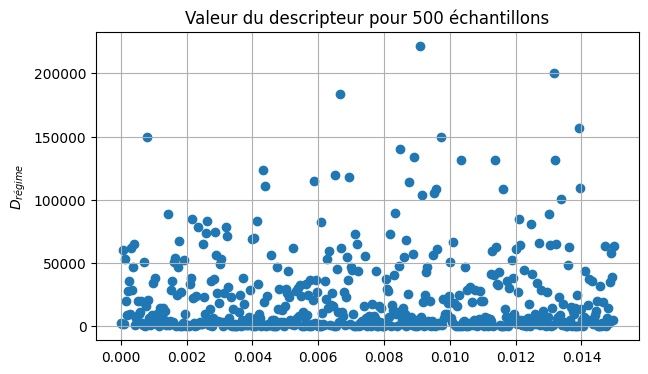

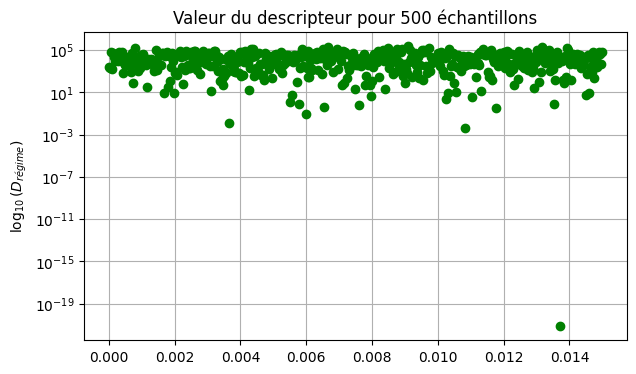

In [23]:
# esp2 = ...

plt.figure(figsize = (7,4))
plt.scatter(np.arange(len(D_regime))*delta_t, D_regime)
#plt.hlines(eps1, xmin, xmax, colors = "orange", linestyles = "--", label ="seuil de classification" )
plt.ylabel(r"$D_{régime}$")
plt.title("Valeur du descripteur pour 500 échantillons")
plt.grid()
plt.show()

plt.figure(figsize = (7,4))
plt.semilogy(np.arange(len(D_regime))*delta_t, D_regime, "go")
#plt.hlines(eps1, xmin, xmax, colors = "orange", linestyles = "--", label ="seuil de classification" )
plt.ylabel(r"$\log_{10}(D_{régime})$")
plt.title("Valeur du descripteur pour 500 échantillons")
plt.grid()

C:\Users\Lalie\AppData\Local\Temp\ipykernel_17096\1097299241.py:4: RuntimeWarning: divide by zero encountered in log10
  zi = np.full_like(xi, np.log10(eps2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


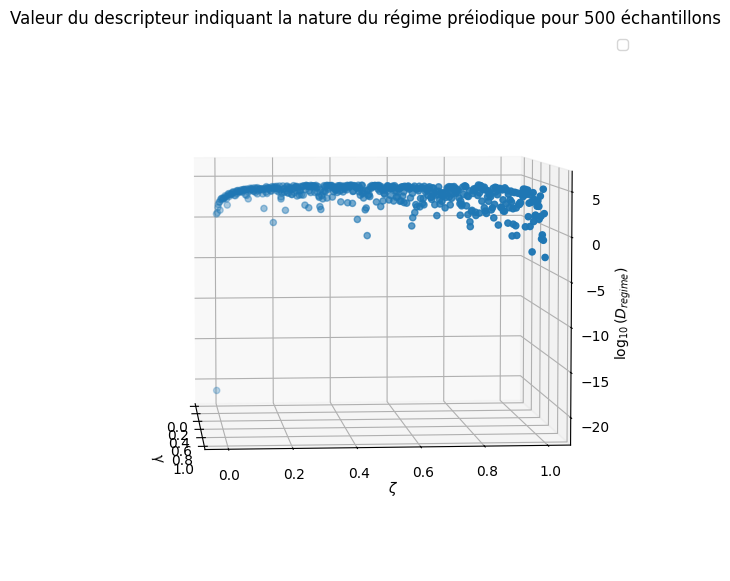

In [22]:
eps2 = 0
axis = np.linspace(0,1,500)
yi, xi = np.meshgrid(axis,axis)
zi = np.full_like(xi, np.log10(eps2))

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,0]], np.log10(D_regime))
#ax.plot_surface(xi,yi,zi,alpha = 0.4, label = "seuil eps2")
ax.set_zlabel(r"$\log_{10}(D_{regime})$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Valeur du descripteur indiquant la nature du régime préiodique pour 500 échantillons")
ax.legend()
ax.view_init(elev=5., azim=-5, roll=0)

In [ ]:
class Classifier_regime():

    def __init__(self, eps2 = 1e-2, cutoff_lowpass = 20, delta_t = delta_t):
        from scipy.signal import butter, filtfilt
        self.eps2 = eps2
        self.fs = 1/delta_t
        self.cutoff = cutoff_lowpass 
        self.b, self.a = butter(4, self.cutoff / (self.fs / 2), btype='low')

    def pwr(self, P) : 
        """
        Renvoie l'enveloppe de puissance de la pression dans l'embouchure
        """
        power = filtfilt(self.b, self.a, P**2)
        return power

    def descripteur_regime(self, P):
        pwr = self.pwr(P)
        D_regime = np.var(pwr)/np.mean(pwr)
        return D_regime
    
    def classifieur_regime(self, P) :
        """
        Renvoie 0 pour un régime quai-périodique, 1 pour un régime périodique.  
        """
        c = 0
        D_note  = self.descripteur_regime(P)
        if D_note < self.eps2 :
            c = 1
        return c 

## 3. Justesse de la note

**Estimation de la fréquence fondamentale par la méthode du produit spectral** (source : TP TSM, Geoffroy Peeters)

Si nous notons $f_k = \frac{k}{N_{fft}}$ les fréquences discrètes de la DFT, le produit spectral est donné par:
\begin{equation}
    P(f_k) = \prod_{h=1}^{H} |X(h \cdot f_k)|
\end{equation}
Par défaut nous utiliserons $H$ = 4.

Détail des étapes de calcul :

Dans un premier temps, nous calculons la transformée de Fourier discrète (TFD) du signal $x(n)$ sur $N_{fft}$ points.
Nous commençons par multiplier $x(n)$ par une fenêtre de hamming de taille $L_n$ (ceci afin de diminuer la hauteur des lobes secondaires).

La longueur $L_n$ ainsi que le type de cette fenêtre détermine la **résolution fréquentielle**, i.e. le pouvoir de séparer en fréquence deux sinusoides adjacentes.

Le nombre de points de la la DFT, $N_{fft}$, détermine lui la **précision fréquentielle**., i.e. la distance en Hz entre $f_k$ et $f_{k+1}$.
Il faut impérativement utiliser une valeur de $N_{fft}$ supérieure à $L_n$. En pratique $N_{fft}$ est choisi comme une puissance de 2 de manière à pouvoir utiliser l'algorithme de FFT (Fast Fourier Transform). Ceci peut se calculer à l'aide de la fonction ```nextpow2```.

Calculer ensuite la transformée de Fourier Discrète $X(k)$.

In [ ]:
# Test du code sur des signaux de pression

def F_plot1(x_v, y_v, labelX, labelY):
    plt.plot(x_v, y_v)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.grid(True)
    return

def F_plot2(data_m, col_v=np.zeros(0), row_v=np.zeros(0), labelCol='', labelRow=''):
    plt.imshow(data_m, origin='lower', aspect='auto', extent=[row_v[0], row_v[-1], col_v[0], col_v[-1]], interpolation='nearest')
    plt.colorbar()
    plt.set_cmap('gray_r')
    plt.xlabel(labelRow)
    plt.ylabel(labelCol)
    plt.grid(True)
    return

do_student = True

def F_getSpectreFromAudio(x, L_n, Nfft, sr_hz, audioname):
    """
    inputs:
        - x: signal
        - L_n: window duration in samples
        - Nfft: fft size
        - sr_hz: sampling rate
    outputs:
        - fftFreq_hz_v (N/2+1,): vector containing the DFT frequencies in Hz
        - fftAmpl_v (N/2+1,): vector containing the DFT amplitudes
    """

    if do_student:
        sig = x[:L_n]*np.hamming(L_n)
        fftFreq_hz_v = np.abs(np.fft.fftfreq(Nfft, d=1/sr_hz))
        fftAmpl_v = np.abs(np.fft.fft(sig, Nfft))

    # +++++++++++++++++++++++++++++++
    plt.figure(figsize=(15, 5))
    F_plot1(fftFreq_hz_v, fftAmpl_v, 'Frequency [Hz]', 'Amplitude [lin]')
    plt.xlim((0,3000))
    plt.title(audioname)
    # +++++++++++++++++++++++++++++++

    return fftFreq_hz_v, fftAmpl_v

#params fft
def nextpow2(i):
    n = 1
    while n < i:
        n *= 2
    return n
L_sec = 0.1
L_n = int(L_sec*fs)
Nfft = 4*nextpow2(L_n)

fftFreq_hz_v, fftAmpl_v = F_getSpectreFromAudio(P, L_n, Nfft, fs, "audioFile")

def F_getF0FromSpectre(fftFreq_hz_v, fftAmpl_v, H, fmin_hz, fmax_hz, Nfft, sr_hz, display = True):
    """
    inputs:
        - fftFreq_hz_v (N/2+1,): vector containing the FFT frequencies in Hz
        - fftAmpl_v (N/2+1,): vector containing the FFT amplitude
        - H: number of times the spectrum is decimated
        - fmin_hz: minimum frequency in Hz to look for F0
        - fmax_hz: maximum frequency in Hz to look for F0
        - Nfft: fft size
        - sr_hz: sampling rate
    outputs:
        - spFreq_hz_v: vector containing the SpectralProduct frequencies in Hz
        - spAmpl_v: vector containing the SpectralProduct amplitudes
        - f0_hz: estimated F0 in Hz
    """

    if do_student:
        R = int(Nfft/(2*H) + 1)
        spAmpl_v = np.ones(R)
        spFreq_hz_v = fftFreq_hz_v[:R]
        for h in range(H) :
          X = fftAmpl_v[::h+1] 
          spAmpl_v = spAmpl_v*X[:R]
        Nmin = int(fmin_hz*Nfft/sr_hz)
        Nmax = min(R,int(fmax_hz*Nfft/sr_hz))
        i_max = np.argmax(spAmpl_v[Nmin:Nmax]) + Nmin
        f0_hz = spFreq_hz_v[i_max]
        
    # +++++++++++++++++++++++++++++++
    if display : 
        plt.figure(figsize=(10,6))
        F_plot1(fftFreq_hz_v, fftAmpl_v/np.max(fftAmpl_v), 'Frequency [Hz]', 'Amplitude [lin]')
        plt.plot(spFreq_hz_v, spAmpl_v/np.max(spAmpl_v), 'r')
        plt.xlim((0,3000))
        plt.plot(f0_hz, 1, 'ro')
    # +++++++++++++++++++++++++++++++

    return spFreq_hz_v, spAmpl_v, f0_hz

spFreq_hz_v, spAmpl_v, f0_hz = F_getF0FromSpectre(fftFreq_hz_v, fftAmpl_v, 4, 50, 900, Nfft, fs)

In [ ]:
class Classifier_justesse():

    def __init__(self, f_ref, eps3 = 5, delta_t = delta_t, L_sec = 0.1, H = 4, fmin = 50, fmax = 900):
        self.f_ref = f_ref
        self.eps3 = eps3 # l'écart maximal en cents à la note de référence. Par défaut : 5 cents
        # params fft
        self.fs = 1/delta_t
        self.L_sec = L_sec
        self.L_n = int(L_sec*self.fs)
        self.Nfft = 4*self.nextpow2(self.L_n)
        # params produit spectral
        self.H = H
        self.fmin = fmin
        self.fmax = fmax


    def nextpow2(self, i):
        n = 1
        while n < i:
            n *= 2
        return n
    
    def get_spectre(self, x):
        sig = x[:L_n]*np.hamming(self.L_n)
        fftFreq_hz_v = np.abs(np.fft.fftfreq(self.Nfft, d=1/self.fs))
        fftAmpl_v = np.abs(np.fft.fft(sig, self.Nfft))
        return fftFreq_hz_v, fftAmpl_v

    def get_pitch(self, P):
        fftFreq_hz_v, fftAmpl_v = self.get_spectre(P)
        R = int(self.Nfft/(2*self.H) + 1)
        spAmpl_v = np.ones(R)
        spFreq_hz_v = fftFreq_hz_v[:R]
        for h in range(self.H) :
          X = fftAmpl_v[::h+1] 
          spAmpl_v = spAmpl_v*X[:R]
        Nmin = int(self.fmin*Nfft/self.fs)
        Nmax = min(R,int(self.fmax*Nfft/self.fs))
        i_max = np.argmax(spAmpl_v[Nmin:Nmax]) + Nmin
        f0_hz = spFreq_hz_v[i_max]
        return f0_hz

    def descripteur_justesse(self, P):
        f_act = self.get_pitch(P)
        D_note = 1200*np.log2(f_act/self.f_ref)
        return D_note
    
    def classifieur_justesse(self,P):
        """
        Renvoie 0 si la note n'est pas juste, 1 sinon.  
        """
        c = 0
        D_note  = self.descripteur_justesse(P)
        if D_note < self.eps3 :
            c = 1
        return c

## 4. Longueur du transitoire d'attaque

## 5. Bifurcation directe ou inverse